<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Several-Securities:-Risk-and-Expected-Return" data-toc-modified-id="Several-Securities:-Risk-and-Expected-Return-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Several Securities: Risk and Expected Return</a></span><ul class="toc-item"><li><span><a href="#Porfolio-risk-and-expected-return" data-toc-modified-id="Porfolio-risk-and-expected-return-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Porfolio risk and expected return</a></span><ul class="toc-item"><li><span><a href="#Theoretical-development" data-toc-modified-id="Theoretical-development-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Theoretical development</a></span></li><li><span><a href="#Function-for-calculating-the-portfolio-return-and-variance" data-toc-modified-id="Function-for-calculating-the-portfolio-return-and-variance-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Function for calculating the portfolio return and variance</a></span></li><li><span><a href="#Why-portfolio-diversification-can-reduce-the-unsystematic-risk?" data-toc-modified-id="Why-portfolio-diversification-can-reduce-the-unsystematic-risk?-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Why portfolio diversification can reduce the unsystematic risk?</a></span></li></ul></li><li><span><a href="#Minimum-variance-portfolio" data-toc-modified-id="Minimum-variance-portfolio-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Minimum variance portfolio</a></span><ul class="toc-item"><li><span><a href="#Proposition-of-minimum-variance-portfolio" data-toc-modified-id="Proposition-of-minimum-variance-portfolio-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Proposition of minimum variance portfolio</a></span></li><li><span><a href="#Function-for-calculating-the-weights-of-MVP" data-toc-modified-id="Function-for-calculating-the-weights-of-MVP-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Function for calculating the weights of MVP</a></span></li></ul></li></ul></li></ul></div>

# Several Securities: Risk and Expected Return

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
from tqdm.notebook import tqdm
tqdm.pandas()

## Porfolio risk and expected return

### Theoretical development

For the portfolio constructed by $n$ different securities, the weight for security $i$ is:

\begin{equation*}
    w_i = \frac{x_iS_i(0)}{V(0)}, i = 1, 2, ..., n.
\end{equation*}

Here $x_i$ is the amount of security $i$ in the portfolio, $S_i(0)$ is the initial price of security $i$, $V(0)$ is the initial amount of investment in the portfolio. The weight can be expressed as:

\begin{equation*}
    \mathrm{w} = 
    \begin{bmatrix}  
        w_1 & w_2 & ... & w_n
    \end{bmatrix}.
\end{equation*}

The sum of weights equal zero, as:

\begin{equation}
    1 = \mathrm{w}\mathrm{u}^T,
    \mathrm{u} = 
    \begin{bmatrix}
        1 & 1 & ... & 1
    \end{bmatrix}.
\end{equation}

The stock returns in the feasible portfolio are $K_1,...,K_n$, and the expected returns are $\mu_i = E(K_i)$, $i=1,2,...n$:

\begin{equation*}
    \mathrm{m}=
    \begin{bmatrix}
        \mu_1 & \mu_2 & ... & \mu_n
    \end{bmatrix}.
\end{equation*}

The covariance between two stock returns is expressed as $c_{ij} = Cov(K_i,K_j)$, or in $n\times n$ covariance matrix:

\begin{equation*}
    \mathrm{C} =
    \begin{bmatrix}
        c_{11}&c_{12}&\cdots&c_{1n}\\
        c_{21}&c_{22}&\cdots&c_{2n}\\
        \vdots & \vdots & \ddots & \vdots\\
        c_{n1}&c_{n2}&\cdots&c_{nn}\\
    \end{bmatrix}.
\end{equation*}

The diagonal elements of the matrix are the variance of the stock return, $c_{ii}=\sigma_i^2=Var(K_i)$.

The expected return and the variance of the portfolio are:

\begin{equation}
    \mu_V = \mathrm{w}\mathrm{m}^T,
\end{equation}

\begin{equation}
    \sigma_V^2 = \mathrm{w}\mathrm{C}\mathrm{w}^T
\end{equation}

\begin{proof}
    \begin{equation*}
        \mu_V = E(K_V) = E(\sum_{i=1}^nw_iK_i) = \sum_{i=1}^nw_i\mu_i = \mathrm{w}\mathrm{m}^T
    \end{equation*}
    \begin{align*}
        \sigma_V^2 & = Var(K_V) = Var(\sum_{i=1}^nw_iK_i) \\
            &= Cov(\sum_{i=1}^nw_iK_i, \sum_{j=1}^nw_jK_j) = \sum_{i,j=1}^nw_iw_jc_{ij} \\
            &= \mathrm{w}\mathrm{C}\mathrm{w}^T
     \end{align*}
\end{proof}



### Function for calculating the portfolio return and variance

**Description of** `calPortRetVar(weightList, eRetList, stdList, corrList, printResults=True)`:

Use lists of securities' weights, expected returns, standard deviations, and pearson correlations to calculate the portfolio's expected return and variance, and standard deviation.

**Keyword arguments**:

- `printResults=True`: default is `True`, will print the portfolio's expected return, variance/standard deviation, and the percentage of idiosyncratic variances out of the portfolio variance. If `False`, will not print anything, but return a dictionary containing the portfolio return, variance, standard deviation, and the proportion of diagonal variances.

- `printVar=True`: default is `True`, when `printResults=True`, print the portfolio variance, if `printVar=False`, print the portfolio standard deviation.


In [3]:
def calPortRetVar(weightList, eRetList, stdList, corrList, printResults=True, printVar=True):
    
    portERet = np.dot(np.array(weightList), np.array(eRetList).transpose())
    
    CovMat = []
    n = len(stdList)
    for x in range(1,n+1):
        Cxy = []
        for y in range(1,n+1):
            if x == y:   
                Cxy.append(stdList[x-1]**2)
            elif x < y:
                idx = int((y-x-1)*n-(((y-x)*(y-x-1))/2)+x)
                Cxy.append(corrList[idx-1]*stdList[x-1]*stdList[y-1])
            elif x > y:
                idx = int((x-y-1)*n-(((x-y)*(x-y-1))/2)+y)
                Cxy.append(corrList[idx-1]*stdList[x-1]*stdList[y-1])
        
        CovMat.append(Cxy)
        
    portVar = np.dot(np.dot(weightList, CovMat), np.array(weightList).transpose())
    portSD = np.sqrt(portVar)
    msv = sum(map(lambda x: x**2, stdList))/(n**2)
    if printResults:
        print("The portfolio's expected return is: %s" % round(portERet, 4))
        if printVar:
            print("The portfolio's variance is %s" % round(portVar,4))
        else:
            print("The portfolio's standard deviation is %s" % round(portSD,4))
        print("The idiosyncratic variances account for %s%% of the portfolio variance" % round((msv/portVar)*100,2))
    else:
        volaDict = dict()
        volaDict["return"] = portERet
        volaDict["variance"] = portVar
        volaDict["std"] = portSD
        volaDict["diagvar"] = msv/portVar
        
        return volaDict
     


**Note**: in order to use the above function, some conditions must be met:
<a id="note_corrList"></a>

1. All the inputs are list, and in order: stock 1, stock 2, ... , stock n.
2. The lengths of weightList, eRetList, and stdList should be equal to $n$.
3. The lengh of corrList equals to $\frac{n!}{2(n-2)!}$.
4. Unlike the codes in Part 1, here the input is the standard deviation rather than variance.
4. The correlation list should follow the combination order from smaller distance between $i$ and $j$ to larger, for example, if $n = 4$:

\begin{bmatrix}
    \rho_{12} & \rho_{23} & \rho_{34} & \rho_{13} & \rho_{24} & \rho_{14}
\end{bmatrix}

Then, the code will build the covariance matrix using $C_{ij} = \rho_{ij}\sigma_{i}\sigma_{j}$ to calculate the covariance for each $i$ and $j$ pair ($i\neq j$). Assuming the index for correlation list starts from 1 instead of 0. For the $n\times n$ covariance matrix, the following equation is used in the above function to identify the index correlation list for the pair $i,j$:

\begin{equation*}
    \mathrm{index} = (|i-j|-1)n-\frac{|i-j|}{2}(|i-j|-1)+min(i,j)
\end{equation*}

In [4]:
weightList = [0.4, -0.2, 0.8]
eRetList = [0.08, 0.1, 0.06]
stdList = [0.15, 0.05, 0.12]
corrList = [0.3, 0, -0.2]

calPortRetVar(weightList, eRetList, stdList, corrList, printResults=True, printVar=False)
calPortRetVar(weightList, eRetList, stdList, corrList, printResults=False)

The portfolio's expected return is: 0.06
The portfolio's standard deviation is 0.1013
The idiosyncratic variances account for 42.7% of the portfolio variance


{'return': 0.06,
 'variance': 0.010252,
 'std': 0.10125216047077712,
 'diagvar': 0.4270169506221008}

### Why portfolio diversification can reduce the unsystematic risk?

Assume the stocks in the portfolio are equal-weighted, which means $w_i=\frac{1}{n}$. If the portfolio is diversified enough ($n \to \infty$), the unsystematic risk of individual security will be eliminated. The systematic risk will remain. This statement under such assumption can be proved as follow:

\begin{proof}
    \begin{align*}
        \sigma_V^2 &= \frac{1}{n^2}\sum_{i=1}^nVar(K_i) + \frac{1}{n^2}\sum_{i,j=1; i\neq j}^nCov(K_i, K_j) \\
            &= \frac{1}{n}\frac{1}{n}\sum_{i=1}^nVar(K_i) + \frac{n^2-n}{n^2}\frac{1}{n^2-n}\sum_{i,j=1; i\neq j}^nCov(K_i, K_j) \\
            &= \frac{1}{n}E[Var(K_i))] + \frac{n^2-n}{n^2}E[Cov(K_i, K_j)]
    \end{align*}
    In a well-diversified portfolio, when $n \to \infty$, $\frac{1}{n} \to 0$ and $\frac{n^2-n}{n^2} \to 1$. Therefore, only the covariance contributes to the volatility ($\sigma_V$) of such well-diversified portfolio.
\end{proof}

**Description** of `plot_corr_matrix(n_sample, dataframe, plotHeat=True)`:

Randomly select a number of sample from a time-series financial return data with every column for every stock, print the number of stocks, equal-weighted portfolio expected return, equal-weighted portfolio standard deviation, and the percentage decrease in the portfolio variance, and plot `seaborn.heatmap` for the portfolio's correlation matrix. When keyword argument `plotHeat=False`, will only return a dictionary containing the portfolio return, variance, and standard deviation.

**Arguments**:

- `n_sample` (type: int): number of sample that are randomly selected from the data set. If exceed the index range of data set, `n_sample` will equal the length of the data set minus 10 (or equal 1 if still out of index range).

- `dataframe` (type: Pandas DataFrame): read from the link to the Github raw file "[crsp_small_sample.xlsx](https://github.com/evanhaozhao/Python-for-mathematical-finance/blob/main/data/crsp_small_sample.xlsx)". The file is a small time-series sample containing 906 CRSP monthly stock returns randomly selected from all industries (excl. financial) as columns, from January 2010 to December 2020.

- `plotHeat=True`: default is `True`, will plot `seaborn.heatmap` for the portfolio's correlation matrix, and print the number of stocks, equal-weighted portfolio expected return, equal-weighted portfolio standard deviation, and the percentage of idiosyncratic variances out of the portfolio variance. If `False`, will only return a dictionary containing the portfolio return, variance, standard deviation, and the proportion of diagonal variances.


In [5]:
def plot_corr_matrix(n_sample, dataframe, plotHeat=True):
    df = dataframe 
    if n_sample < len(df.columns) and n_sample > 0:
        num = n_sample
    else:
        try:
            num = len(df.columns) - 10
        except:
            num = 1
        print("[Error] number out of range. Plot default sample.")

    df_sample = pd.concat([df["yrm"], df.loc[:,df.columns!="yrm"].sample(n=num,axis='columns',replace=False)], axis=1)
    weightList = [1/(len(df_sample.columns)-1)] * (len(df_sample.columns)-1)
    eRetList = [df_sample[df_sample.columns[i]].mean() for i in range(1, len(df_sample.columns))]
    stdList = [df_sample[df_sample.columns[i]].std() for i in range(1, len(df_sample.columns))]
    corrList = []
    for distance in range(1, len(df_sample.columns)-1):
        i = 1
        next_i = i + distance
        while next_i <= len(df_sample.columns)-1:
            correlation = df_sample[df_sample.columns[i]].corr(df_sample[df_sample.columns[next_i]])
            corrList.append(correlation)
            i += 1
            next_i = i + distance
    if plotHeat:
        print("Number of stocks in the EW portfolio: %s" % num)
        calPortRetVar(weightList, eRetList, stdList, corrList, printResults=True, printVar=False)
        corrMat = df_sample.corr()
        f = plt.figure(figsize = (10,6))
        ax = sns.heatmap(corrMat)
        plt.show()
    else:
        return calPortRetVar(weightList, eRetList, stdList, corrList, printResults=False)


**Heatmaps of correlation matrix**

First, we can plot a series of **correlation matrix heatmaps for different number of stocks in the portfolio**. `numList` contains a list of the number of stocks that will be randomly selected from the main dataset into the portfolio. 

The plots below shows the proportion of idiosyncratic volatility (indicated by the diagonal light color squares) is decreasing when there are more and more stocks in the portfolio, consistent with the statement that only the covariance contributes to the volatility of an ideally well-diversified portfolio ($n \to \infty$)

  0%|          | 0/8 [00:00<?, ?it/s]

Number of stocks in the EW portfolio: 2
The portfolio's expected return is: 0.0112
The portfolio's standard deviation is 0.1054
The idiosyncratic variances account for 89.06% of the portfolio variance


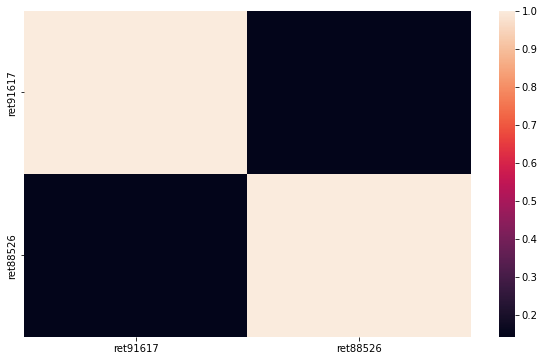

Number of stocks in the EW portfolio: 3
The portfolio's expected return is: 0.0075
The portfolio's standard deviation is 0.0942
The idiosyncratic variances account for 73.58% of the portfolio variance


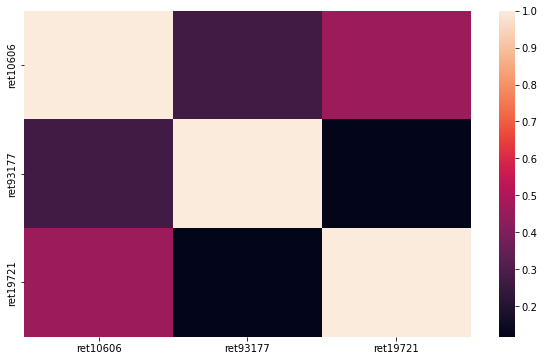

Number of stocks in the EW portfolio: 5
The portfolio's expected return is: 0.0132
The portfolio's standard deviation is 0.0715
The idiosyncratic variances account for 49.05% of the portfolio variance


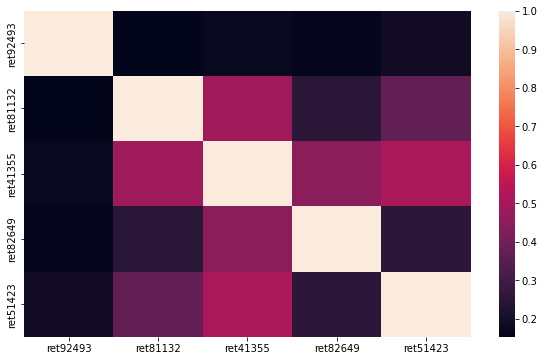

Number of stocks in the EW portfolio: 12
The portfolio's expected return is: 0.0169
The portfolio's standard deviation is 0.0741
The idiosyncratic variances account for 25.33% of the portfolio variance


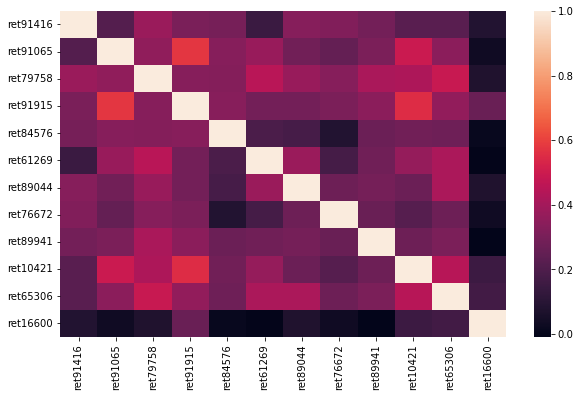

Number of stocks in the EW portfolio: 30
The portfolio's expected return is: 0.0177
The portfolio's standard deviation is 0.0553
The idiosyncratic variances account for 19.1% of the portfolio variance


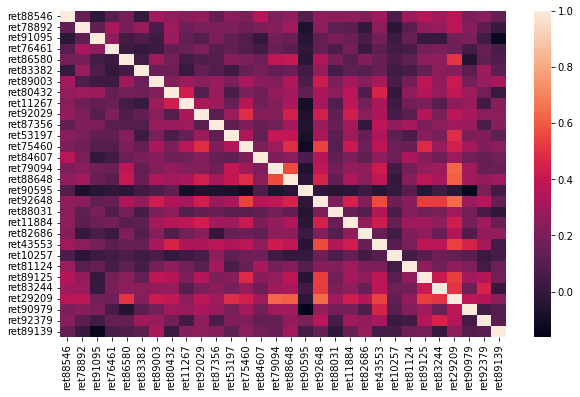

Number of stocks in the EW portfolio: 100
The portfolio's expected return is: 0.0152
The portfolio's standard deviation is 0.0546
The idiosyncratic variances account for 6.25% of the portfolio variance


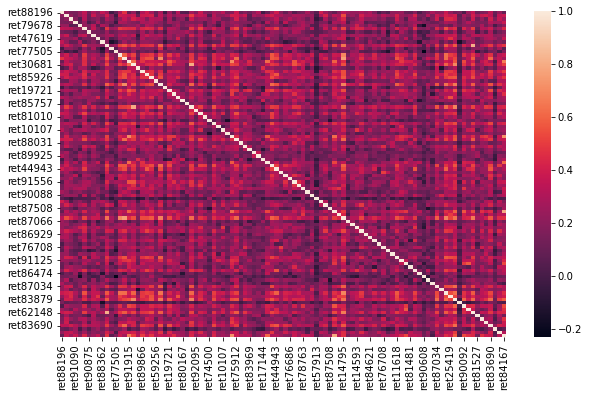

Number of stocks in the EW portfolio: 300
The portfolio's expected return is: 0.0138
The portfolio's standard deviation is 0.0572
The idiosyncratic variances account for 1.85% of the portfolio variance


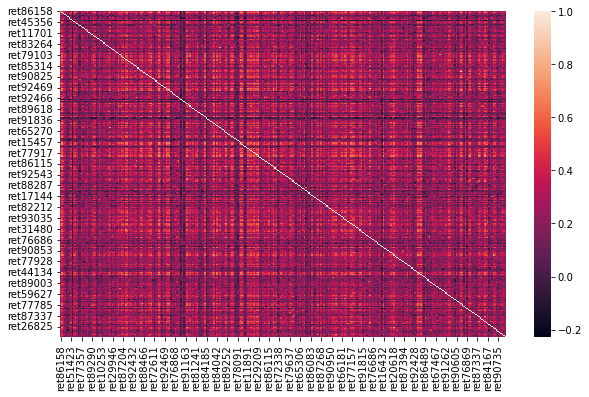

Number of stocks in the EW portfolio: 900
The portfolio's expected return is: 0.0135
The portfolio's standard deviation is 0.0559
The idiosyncratic variances account for 0.62% of the portfolio variance


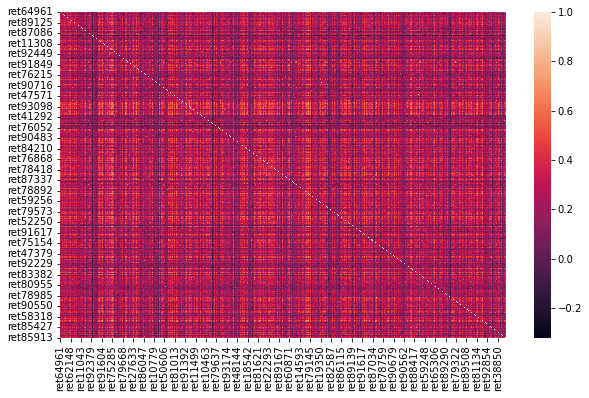

In [6]:
numList = [2, 3, 5, 12, 30, 100, 300, 900]
sample_url = "https://raw.github.com/evanhaozhao/Python-for-mathematical-finance/main/data/crsp_small_sample.xlsx"
df = pd.read_excel(sample_url)
for n_sample in tqdm(numList):
    plot_corr_matrix(n_sample, df, plotHeat=True)
    

**Random selection for number of stocks**

Use below cell to test the random sample selection function of `plot_corr_matrix` with `plotHeat=False`, under which circumstance the output of `plot_corr_matrix` is a dictionary.

In [7]:
plot_corr_matrix(10, df, plotHeat=False)

{'return': 0.013411779090496238,
 'variance': 0.004974473748940599,
 'std': 0.07052994930482084,
 'diagvar': 0.3784352862914476}

To further illustrate the effect of diversification on variance, we construct a DataFrame called `dfRetVar` with each row as a portfolio consisting of different number of stocks randomly selected from the previous CRSP sample file.

In [8]:
listRetVar = []
for i in tqdm(range(2,300,5)):
    dictRetVar = plot_corr_matrix(i, df, plotHeat=False)
    dictRetVar["num_stock"] = i
    listRetVar.append(dictRetVar)

dfRetVar = pd.DataFrame(listRetVar)
dfRetVar.head(10)

  0%|          | 0/60 [00:00<?, ?it/s]

,return,variance,std,diagvar,num_stock
0,0.012502,0.009062,0.095192,0.934812,2
1,0.014243,0.006508,0.080669,0.515348,7
2,0.018026,0.004661,0.068269,0.502222,12
3,0.019046,0.003799,0.061633,0.298044,17
4,0.014085,0.003250,0.057006,0.167664,22
5,0.016742,0.004234,0.065068,0.163414,27
6,0.014426,0.004853,0.069664,0.137153,32
7,0.012808,0.003722,0.061010,0.109052,37
8,0.013808,0.002744,0.052387,0.120151,42
9,0.013791,0.003035,0.055090,0.102587,47


**Volatility line chart**

From the line chart below, we observe when the number of stocks in the portfolio increase, the portfolio's volatility and the proportion of idiosyncratic variance decrease.

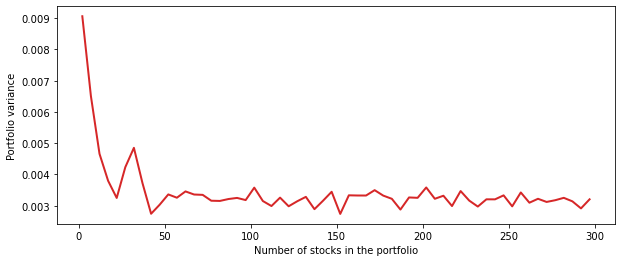

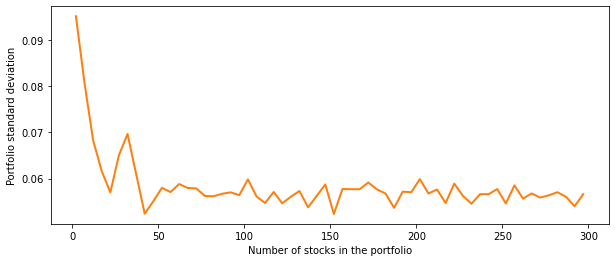

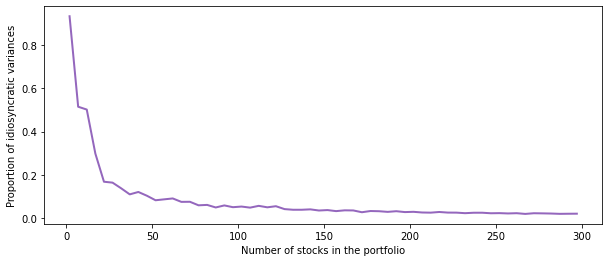

In [9]:
colDict = {"variance":"Portfolio variance", "std": "Portfolio standard deviation", \
               "diagvar": "Proportion of idiosyncratic variances"}
for k, v in colDict.items():
    f = plt.figure(figsize=(10, 4))
    color = random.choice(list(mcolors.TABLEAU_COLORS.values()))
    plt.plot("num_stock", k, data=dfRetVar, c=color, ls='-', lw=2)
    plt.xlabel("Number of stocks in the portfolio")
    plt.ylabel("%s" % v)
    plt.show()

## Minimum variance portfolio



### Proposition of minimum variance portfolio

Assume $\mathrm{det}$ $\mathrm{C} \neq 0$, the portfolio with the smallest variance in the attainable set has weights:

\begin{equation}
    \mathrm{w} = \frac{\mathrm{uC}^{-1}}{\mathrm{uC}^{-1}\mathrm{u}^T}
\end{equation}

\begin{proof}

We need to find the minimum of the portfolio variance $\sigma_V^2 = \mathrm{w}\mathrm{C}\mathrm{w}^T$ subject to the constraint $\mathrm{w}\mathrm{u}^T=1$. To this end we can use the method of Lagrange multipliers:

\begin{align*}
    \mathrm{F}(\mathrm{w},\lambda) = \mathrm{w}\mathrm{C}\mathrm{w}^T − \lambda(\mathrm{w}\mathrm{u}^T-1),
\end{align*}

where $\lambda$ is a Lagrange multiplier. Equating to zero the partial derivatives of $F$ with respect to the weights $w_i$ we obtain $2\mathrm{w}\mathrm{C} − \lambda \mathrm{u} = 0$, that is:

\begin{align*}
    \mathrm{w}=\frac{\lambda}{2}\mathrm{u}\mathrm{C}^{-1},
\end{align*}

which is a necessary condition for a minimum. Substituting this into constraint $\mathrm{w}\mathrm{u}^T=1$, we obtain:

\begin{align*}
    \frac{\lambda}{2}\mathrm{u}\mathrm{C}^{-1}\mathrm{u}^T=1,
\end{align*}

where we use the fact that $\mathrm{C}^{−1}$ is a symmetric matrix because $C$ is. Solving this for $\lambda$ and substituting the result into the expression for $\mathrm{w}$ will give the asserted formula.

\end{proof}

### Function for calculating the weights of MVP

Below is the function to calculate the weights, return, and variance of the minimum variance portfolio.

**Description** of `calMVP(eRetList, stdList, corrList, returnType="weightList")`:

**Arguments**

- `eRetList`, `stdList`, `corrList`: like what we did before, these three parameters are lists of stock returns, standard deviations, and correlations (*see* previous [Note](#note_corrList) for the required correlation order in the list)
- `returnType="weightList"`: default is to return a list of weights with minimum portfolio variance. Besides, there are two options: `"fullPrint"` to print the minimum variance portfolio's weights, return and variance; `"dictionary"` to return a dictionary of the minimum variance portfolio's return and variance.

In [10]:
def calMVP(eRetList, stdList, corrList, returnType="weightList"):
    
    CovMat = []
    n = len(stdList)
    u = np.array([1] * n)
    for x in range(1,n+1):
        Cxy = []
        for y in range(1,n+1):
            if x == y:   
                Cxy.append(stdList[x-1]**2)
            elif x < y:
                idx = int((y-x-1)*n-(((y-x)*(y-x-1))/2)+x)
                Cxy.append(corrList[idx-1]*stdList[x-1]*stdList[y-1])
            elif x > y:
                idx = int((x-y-1)*n-(((x-y)*(x-y-1))/2)+y)
                Cxy.append(corrList[idx-1]*stdList[x-1]*stdList[y-1])
        CovMat.append(Cxy)
    
    weightArray = np.dot(u,np.linalg.inv(CovMat))/np.dot(np.dot(u,np.linalg.inv(CovMat)),u.transpose())
    weightList = list(weightArray)
    portERet = np.dot(np.array(weightList), np.array(eRetList).transpose())
    portVar = np.dot(np.dot(weightList, CovMat), np.array(weightList).transpose())
    if returnType == "weightList":
        return weightList
    elif returnType == "fullPrint":
        weightRound = list(np.round(weightArray,3))
        print("Weights for the minimum variance portfolio are: %s, sum to %s" %(weightRound, int(np.sum(weightArray))))
        print("The portfolio's expected return is: %s" % round(portERet, 4))
        print("The portfolio's variance is %s" % round(portVar,4))
        try:
            print("The portfolio's standard deviation is %s" % round(np.sqrt(portVar),4))
        except:
            pass
    elif returnType == "dictionary":
        volaDict = dict()
        volaDict["return"] = portERet
        volaDict["variance"] = portVar
        
        return volaDict
  

In [11]:
eRetList = [0.2, 0.13, 0.17]
stdList = [0.25, 0.28, 0.2]
corrList = [0.3, 0, 0.15]

calMVP(eRetList, stdList, corrList, returnType="fullPrint")

Weights for the minimum variance portfolio are: [0.228, 0.235, 0.537], sum to 1
The portfolio's expected return is: 0.1674
The portfolio's variance is 0.0232
The portfolio's standard deviation is 0.1523


In [12]:
def calSampleMVP(n_sample, dataframe, returnDict=False):
    df = dataframe 
    if n_sample < len(df.columns) and n_sample > 0:
        num = n_sample
    else:
        try:
            num = len(df.columns) - 10
        except:
            num = 1
        print("[Error] number out of range. Plot default sample.")
    
    df_sample = pd.concat([df["yrm"], df.loc[:,df.columns!="yrm"].sample(n=num,axis='columns',replace=False)], axis=1)
    corrList = []
    for distance in range(1, len(df_sample.columns)-1):
        i = 1
        next_i = i + distance
        while next_i <= len(df_sample.columns)-1:
            correlation = df_sample[df_sample.columns[i]].corr(df_sample[df_sample.columns[next_i]])
            corrList.append(correlation)
            i += 1
            next_i = i + distance
    eRetList = [df_sample[df_sample.columns[i]].mean() for i in range(1, len(df_sample.columns))]
    stdList = [df_sample[df_sample.columns[i]].std() for i in range(1, len(df_sample.columns))]
    weightList = calMVP(eRetList, stdList, corrList, returnType="weightList")
    if returnDict:
        return calMVP(eRetList, stdList, corrList, returnType="dictionary")
    else:
        return calMVP(eRetList, stdList, corrList, returnType="fullPrint")
            

In [13]:
calSampleMVP(20, df, returnDict=False)

Weights for the minimum variance portfolio are: [0.11, -0.03, 0.332, 0.198, -0.076, 0.242, 0.022, -0.031, -0.006, -0.031, -0.004, 0.107, -0.076, -0.003, 0.038, 0.157, 0.008, -0.002, 0.019, 0.026], sum to 1
The portfolio's expected return is: 0.0128
The portfolio's variance is 0.0014
The portfolio's standard deviation is 0.0372


In [14]:
listMVP = []
for i in tqdm(range(2,300,5)):
    dictMVP = calSampleMVP(i, df, returnDict=True)
    dictMVP["num_stock"] = i
    listMVP.append(dictMVP)

dfMVP = pd.DataFrame(listMVP).rename(columns={"return":"return_mvp","variance":"variance_mvp"})
dfMVP.head(10)

  0%|          | 0/60 [00:00<?, ?it/s]

,return_mvp,variance_mvp,num_stock
0,0.021523,0.008861,2
1,0.021569,0.004338,7
2,0.008988,0.001278,12
3,0.013424,0.001106,17
4,0.013455,0.001170,22
5,0.011322,0.001348,27
6,0.012898,0.001158,32
7,0.013765,0.000795,37
8,0.013728,0.000667,42
9,0.012839,0.000811,47


We can plot portfolio variance and return of different portfolio weights. Blue portfolios are equal weighted, while orange portfolios are weighted by minimum variance weights.

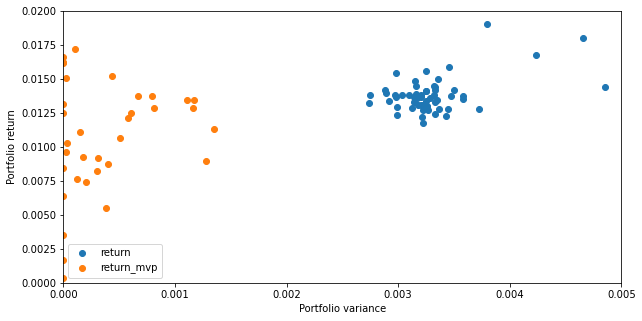

In [15]:
f = plt.figure(figsize=(10,5))
plt.scatter("variance", "return", data=dfRetVar)
plt.scatter("variance_mvp", "return_mvp", data=dfMVP)
plt.xlim(0,0.005)
plt.ylim(0,0.02)
plt.xlabel("Portfolio variance")
plt.ylabel("Portfolio return")
plt.legend()
plt.show()